# AME 4593/5593 - HW01 Solutions

In [1]:
import math

## Problem 1
The equation of a body in Earth orbit is
\begin{equation*}
r = \frac{1.5}{1+0.5\cos \nu}~\text{DU}.
\end{equation*}

a) (1.0) Find the eccentricity and the semi-major axis of the body's orbit.

From the polar equation o a conic section
\begin{equation*}
r = \frac{p}{1+e\cos \nu}
\end{equation*}
and from
\begin{equation*}
p = a\left(1-e^2\right),
\end{equation*}
we have $\boxed{e = 0.5}$ and $\boxed{a = 2~\text{DU}}$.

b) (1.0) Calculate the time of flight from one end of the minor axis out to apogee.

The time of flight between two arbitrary points is given by:
\begin{equation*}
TOF = t-t_0 = \sqrt{\frac{a^3}{\mu}}\left[ 2k \pi +(E-e\sin E)-(E_0-e\sin E_0) \right],
\end{equation*}
where E is the eccentric anomaly. Since to go from the end of the minor axis out to the apogee, the satellite doesn't cross the perigee, $k=0$.Then we have:
\begin{equation*}
TOF = t-t_0 = \sqrt{\frac{a^3}{\mu}}\left[(E-e\sin E)-(E_0-e\sin E_0) \right].
\end{equation*}
At the end of the minor axis, $E_0 = \pi/2$, and at the apogee, $E = \pi$. Additionally, $\mu = 1~\text{DU}^3/\text{TU}^2$ in canonical units. Thus,

In [2]:
k = 0
mu = 1
E_0 = math.pi/2
E = math.pi
e = 0.5
a = 2

In [3]:
genTOF = math.sqrt(a**3/mu)*(2*k*math.pi+(E-e*math.sin(E))-(E_0-e*math.sin(E_0)))
print(f"genTOF = {genTOF} TU")

genTOF = 5.857096500531462 TU


## Problem 2
(2.0) A satellite is in earth orbit for which the perigee height is 200 km and the apogee height is 600 km. Find the time interval during which the satellite remains above an altitude of 400 km.

<img src="HW01-Fig01.png" 
     align="left" 
     width="400" />

In [4]:
# Gravitational parameter
mu = 3.986004418e5 # km^3/s^2

# Equatorial radius of the Earth
R_e = 6378.14 # km

print(f"mu = {mu} km^3/s^2")
print(f"R_e = {R_e} km")

mu = 398600.4418 km^3/s^2
R_e = 6378.14 km


In [5]:
r_p = 200 + R_e
r_a = 600 + R_e

a = (r_p + r_a)/2
print(f"a = {a} km")

e = (r_a - r_p)/(r_a + r_p)
print(f"e = {e}")

p = a*(1-e**2)
print(f"p = {p} km")

P = 2*math.pi*math.sqrt(a**3/mu)
print(f"Period = {P/60} min")

a = 6778.14 km
e = 0.029506619810154407
p = 6772.2386760379695 km
Period = 92.56046597165944 min


In [6]:
r_1 = 400 + R_e # position at t_0
print(f"r_1 = {r_1} km")

# cosine of the true anomaly at t_0
cosnu_0 = (p-r_1)/(r_1*e)
print(f"cos(nu_0) = {cosnu_0}")

# Eccentric anomaly
E_0 = math.acos((e + cosnu_0)/(1 + e*cosnu_0))
print(f"E_0 = {E_0} radians")

E = 2*math.pi - E_0
print(f"E = {E} radians")

r_1 = 6778.14 km
cos(nu_0) = -0.029506619810154008
E_0 = 1.5707963267948961 radians
E = 4.71238898038469 radians


\begin{equation*}
    TOF = t-t_0 = \sqrt{\frac{a^3}{\mu}}\left[ 2k \pi +(E-e\sin E)-(E_0-e\sin E_0) \right],
\end{equation*}

In [7]:
k = 0 #it doesn't cross the periasis
# TOF
genTOF = math.sqrt(a**3/mu)*(2*k*math.pi+(E-e*math.sin(E))-(E_0-e*math.sin(E_0)))
print(f"TOF = {genTOF} s")
print(f"TOF = {genTOF/60} min")

TOF = 2828.9750346403303 s
TOF = 47.14958391067217 min


## Problem 3-a

### Orbit 1

In [8]:
# Initial radius
r_1 = 3000.0 + R_e
print(f"r_1 = {r_1} km")

r_1 = 9378.14 km


In [9]:
v_1 = math.sqrt(mu/r_1)
print(f"v_1 = {v_1} km/s")

v_1 = 6.5194435911910595 km/s


### Orbit 2

In [10]:
# Final radius
r_2 = 6000.0 + R_e
print(f"r_2 = {r_2} km")

r_2 = 12378.14 km


In [11]:
v_2 = math.sqrt(mu/r_2)
print(f"v_2 = {v_2} km/s")

v_2 = 5.674677600433558 km/s


### Transfer orbit

In [12]:
r_p = r_1 # Perigee radius
r_a = r_2 # Apogee radius

# Semi-major axis
a_t = (r_p + r_a)/2.0
print(f"a_t = {a_t} km")

# Energy
E_t = -mu/(2*a_t)
print(f"E_t = {E_t} km^2/s^2")

# Velocity at perigee
v_p = math.sqrt(2.0*(mu/r_p + E_t))
print(f"v_p = {v_p} km/s")

# Velocity at apogee
v_a = math.sqrt(2.0*(mu/r_a + E_t))
print(f"v_a = {v_a} km/s")

a_t = 10878.14 km
E_t = -18.321167120481995 km^2/s^2
v_p = 6.954419834643316 km/s
v_a = 5.268927547116276 km/s


### Transfer $\Delta v$

In [13]:
# First delta-v
dv_1 = v_p - v_1
print(f"dv_1 = {dv_1} km/s")

# Second delta-v
dv_2 = v_2 - v_a
print(f"dv_2 = {dv_2} km/s")

# Total delta-v for thr Hohmann transfer
dv_t = abs(dv_1) + abs(dv_2)
print(f"dv_t = {dv_t:7.5} km/s")

dv_1 = 0.4349762434522564 km/s
dv_2 = 0.40575005331728153 km/s
dv_t = 0.84073 km/s


### Time of Flight (TOF)

In [14]:
TOF_ho = math.pi*math.sqrt(a_t**3/mu)
print(f"TOF (Hohmann) = {TOF_ho} s or {TOF_ho/3600} hours")

TOF (Hohmann) = 5645.636998348809 s or 1.568232499541336 hours


## Problem 3-b

### Initial orbit (Orbit 1)

In [15]:
# Initial radius (km)
r_1 = 200 + R_e #7000
print(f"r_1 = {r_1} km")

# Velocity for the circular orbit 1 (km/s)
v_1 = math.sqrt(mu/r_1)
print(f"v_1 = {v_1} km/s")

r_1 = 6578.14 km
v_1 = 7.784259973535914 km/s


### Final Orbit (Orbit 2)

In [16]:
# Initial radius (km)  #72559.50
r_2 = 72559.50 + R_e #210000
print(f"r_2 = {r_2} km")

# Velocity for the circular orbit 1 (km/s)
v_2 = math.sqrt(mu/r_2)
print(f"v_2 = {v_2} km/s")

r_2 = 78937.64 km
v_2 = 2.2471228649225616 km/s


### Bi-elliptic transfer (Orbits $t_1$ and $t_2$) for a single value of $e = 0.846154$. With this value of eccentricity, this is actually a Hohmann transfer.

In [17]:
### First transfer orbit (Orbit t_1) ###
print(f"Orbit t_1")

# Perigee radius
rp_t1 = r_1

e_t1 = 0.846154 #0.935484

# The apogee radius will be calculated as a function of the eccentricity
ra_t1 = rp_t1*(1 + e_t1)/(1 - e_t1)

print(f"rp_t1 = {rp_t1} km")
print(f"ra_t1 = {ra_t1} km")

# semi-major axis
a_t1 = (rp_t1 + ra_t1)/2

print(f"a_t1 = {a_t1} km")
print(f"e_t1 = {e_t1}")

# Energy
E_t1 = -mu/(2*a_t1)
print(f"E_t1 = {E_t1} km^2/s^2")

# Velocity at the perigee
vp_t1 = math.sqrt(2.0*(mu/rp_t1 + E_t1))
print(f"vp_t1 = {vp_t1} km/s")

# Velocity at the apogee
va_t1 = math.sqrt(2.0*(mu/ra_t1 + E_t1))
print(f"va_t1 = {va_t1} km/s\n")

# Period of the first transfer ellipse:
P_t1 = 2*math.pi*math.sqrt(a_t1**3/mu)


    ### Second transfer orbit (Orbit t_2) ###
print(f"Orbit t_2")

rp_t2 = r_2
ra_t2 = ra_t1

print(f"rp_t2 = {rp_t2} km")
print(f"ra_t2 = {ra_t2} km")

a_t2 = (rp_t2 + ra_t2)/2
e_t2 = (ra_t2 - rp_t2)/(ra_t2 + rp_t2)

print(f"a_t2 = {a_t2} km")
print(f"e_t2 = {e_t2}")

# Energy
E_t2 = -mu/(2*a_t2)
print(f"E_t2 = {E_t2} km^2/s^2")

# Velocity at the perigee
vp_t2 = math.sqrt(2.0*(mu/rp_t2 + E_t2))
print(f"vp_t2 = {vp_t2} km/s")

# Velocity at the apogee
va_t2 = math.sqrt(2.0*(mu/ra_t2 + E_t2))
print(f"va_t2 = {va_t2} km/s\n")

# Period of the second transfer ellipse:
P_t2 = 2*math.pi*math.sqrt(a_t2**3/mu)

    ### Delta-v calculation ###

dv1 = vp_t1 - v_1
dv2 = va_t2 - va_t1
dv3 = v_2 - vp_t2

# total delta-v
dvth = abs(dv1) + abs(dv2) + abs(dv3)

print(f"dv1 = {dv1} km/s")
print(f"dv2 = {dv2} km/s")
print(f"dv3 = {dv3} km/s\n")
print(f"Total delta-v (BI) = {dvth} km/s\n")


Orbit t_1
rp_t1 = 6578.14 km
ra_t1 = 78937.7655159055 km
a_t1 = 42757.95275795275 km
e_t1 = 0.846154
E_t1 = -4.661126364683847 km^2/s^2
vp_t1 = 10.57672699571181 km/s
va_t1 = 0.8813929614659886 km/s

Orbit t_2
rp_t2 = 78937.64 km
ra_t2 = 78937.7655159055 km
a_t2 = 78937.70275795275 km
e_t2 = 7.950314052385987e-07
E_t2 = -2.5247785777490344 km^2/s^2
vp_t2 = 2.2471237581890087 km/s
va_t2 = 2.247120185123931 km/s

dv1 = 2.792467022175897 km/s
dv2 = 1.3657272236579425 km/s
dv3 = -8.932664470329144e-07 km/s

Total delta-v (BI) = 4.158195139100286 km/s



### Bi-elliptic transfer (Orbits $t_1$ and $t_2$). Finding minimum $\Delta v$

In [18]:
import numpy as np

### First transfer orbit (Orbit t_1) ###

# Perigee radius
rp_t1 = r_1

# Opening a file to save the results

file = open('bi-elliptical.dat', 'w')

min_dv = 1000000

# The eccentricity will vary

for e_t1 in np.arange(0, 1, 0.00001):

    # The apogee radius will be calculated as a function of the eccentricity
    ra_t1 = rp_t1*(1 + e_t1)/(1 - e_t1)
    
    # Avoiding apogee radii inside r_2 or equal to r_2
    if ra_t1 <= r_2:
        continue

    # semi-major axis
    a_t1 = (rp_t1 + ra_t1)/2

    # Energy
    E_t1 = -mu/(2*a_t1)

    # Velocity at the perigee
    vp_t1 = math.sqrt(2.0*(mu/rp_t1 + E_t1))

    # Velocity at the apogee
    va_t1 = math.sqrt(2.0*(mu/ra_t1 + E_t1))

    # Period of the first transfer ellipse:
    P_t1 = 2*math.pi*math.sqrt(a_t1**3/mu)


    ### Second transfer orbit (Orbit t_2) ###

    rp_t2 = r_2
    ra_t2 = ra_t1

    a_t2 = (rp_t2 + ra_t2)/2
    e_t2 = (ra_t2 - rp_t2)/(ra_t2 + rp_t2)

    # Energy
    E_t2 = -mu/(2*a_t2)

    # Velocity at the perigee
    vp_t2 = math.sqrt(2.0*(mu/rp_t2 + E_t2))

    # Velocity at the apogee
    va_t2 = math.sqrt(2.0*(mu/ra_t2 + E_t2))

    # Period of the second transfer ellipse:
    P_t2 = 2*math.pi*math.sqrt(a_t2**3/mu)

    ### Delta-v calculation ###

    dv1 = vp_t1 - v_1
    dv2 = va_t2 - va_t1
    dv3 = v_2 - vp_t2

    # total delta-v
    dvt = abs(dv1) + abs(dv2) + abs(dv3)

    if dvt < min_dv:
        min_dv = dvt
        
    file.write(f"{e_t1} {ra_t1-r_2} {ra_t1} {dvt}\n")
          
file.close()

print(f"e = {e_t1}, ra_t1 = {ra_t1} km, delta-v = {dvt} km/s")

e = 0.99999, ra_t1 = 1315621421.8659875 km, delta-v = 4.155147592676302 km/s


### Total $\Delta v$ as a function of the initial eccentricity. 

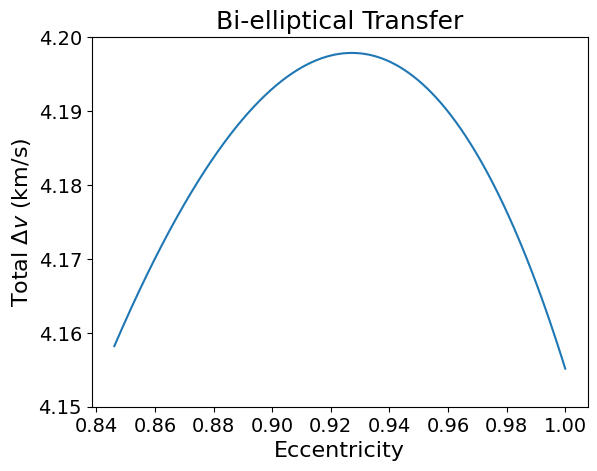

In [19]:
import matplotlib.pyplot as plt
  
x = []
y = []
for line in open('bi-elliptical.dat', 'r'):
    values = [float(n) for n in line.split()]
    x.append(values[0])
    y.append(values[3])
      
plt.title('Bi-elliptical Transfer', fontsize=18)
plt.plot(x, y)

plt.xlabel('Eccentricity', fontsize=16)
# plt.xlim([0.82, 1.02])
plt.xticks(fontsize=14)

plt.ylabel('Total $\Delta v$ (km/s)', fontsize=16)
plt.ylim([4.15, 4.20])
plt.yticks(fontsize=14)
  
plt.show()

### Bi-elliptic transfer (Orbits $t_1$ and $t_2$), considering parabolic orbits (bi-parabolic)

The eccentricity of a parabolic orbit is $e = 0$, and the semi-major axis is $a = \infty$. Consequently, the energy for the first and second transfer orbits will be $E = 0$. In this case, the velocity of orbit $t_1$ at its perigee will be the escape velocity at this point. The same for orbit $t_2$.

In [20]:
### First transfer orbit (Orbit t_1) ###
print(f"Orbit t_1")

# Perigee radius
rp_t1 = r_1

# Velocity at the perigee
vp_t1 = math.sqrt(2.0*mu/rp_t1)
print(f"vp_t1 = {vp_t1} km/s")

    ### Second transfer orbit (Orbit t_2) ###
print(f"Orbit t_2")

rp_t2 = r_2

# Velocity at the perigee
vp_t2 = math.sqrt(2.0*mu/rp_t2)
print(f"vp_t2 = {vp_t2} km/s")

    ### Delta-v calculation ###

dv1 = vp_t1 - v_1
dv2 = v_2 - vp_t2

# total delta-v
dvtp = abs(dv1) + abs(dv2)

print(f"dv1 = {dv1} km/s")
print(f"dv2 = {dv2} km/s\n")
print(f"Total delta-v (parabolic) = {dvtp} km/s\n")


print(f"Hohmann transfer - bi-parabolic = {dvth - dvtp} km/s\n")

Orbit t_1
vp_t1 = 11.008606027612519 km/s
Orbit t_2
vp_t2 = 3.1779116318921714 km/s
dv1 = 3.224346054076605 km/s
dv2 = -0.9307887669696098 km/s

Total delta-v (parabolic) = 4.1551348210462145 km/s

Hohmann transfer - bi-parabolic = 0.003060318054071587 km/s

